<a href="https://colab.research.google.com/github/anurag1504t/MachineLearning/blob/main/2018BCS_011_ML_Lab_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Lab Assignment-2

## Personal Loan classification Problem



```
# Submission Date: 28/02/2021

Anurag Tiwari
2018BCS-011
```

### Data Description

Dataset URL: https://www.kaggle.com/itsmesunil/bank-loan-modelling

```
ID: Customer ID
Age: Customer's age in completed years
Experience: #years of professional experience
Income: Annual income of the customer (in thousands)
ZIPCode: Home Address ZIP code.
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month (in thousands)
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any. (in thousands)
Personal Loan: Did this customer accept the personal loan offered in the last campaign?
Securities Account: Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
CreditCard: Does the customer use a credit card issued by UniversalBank?
```




In [1]:
# Several helpful packages to load in 
import numpy as np
import pandas as pd

In [2]:
#Loading the dataset
loans = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank_Personal_Loan.csv')
loans.head(10) # Mention no of rows to be displayed from the top in the argument

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Dataset Exploration

In [3]:
# Shape of the dataset

loans.shape

(5000, 14)

In [4]:
## gives information about the data types,columns, null value counts, memory usage etc
loans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
## basic statistic details about the data 
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Data Cleaning

Outliers: Minimum value of Experience is -3 which is not possible. Hence such data values must be preprocessed.

In [6]:
# Replacing Data points with Experience < 0 with median value

loans['Experience'].replace(to_replace=[-3,-2,-1], value=loans['Experience'].median(), inplace=True)
loans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# The columns 'ID' and 'ZIP Code' are not needed for prediction so we can remove them.
loans.drop(columns=['ID', 'ZIP Code'], axis=1, inplace=True)

In [8]:
loans.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Dataset Spliting

In [9]:
from sklearn.model_selection import train_test_split
X=loans.drop('Personal Loan', axis=1)
y=loans['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

## Information Gain ID3

### Modeling

In [10]:
# Fitting ID3 to the dataset 
from sklearn.tree import DecisionTreeClassifier
id3=DecisionTreeClassifier(criterion='entropy')
id3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualisation

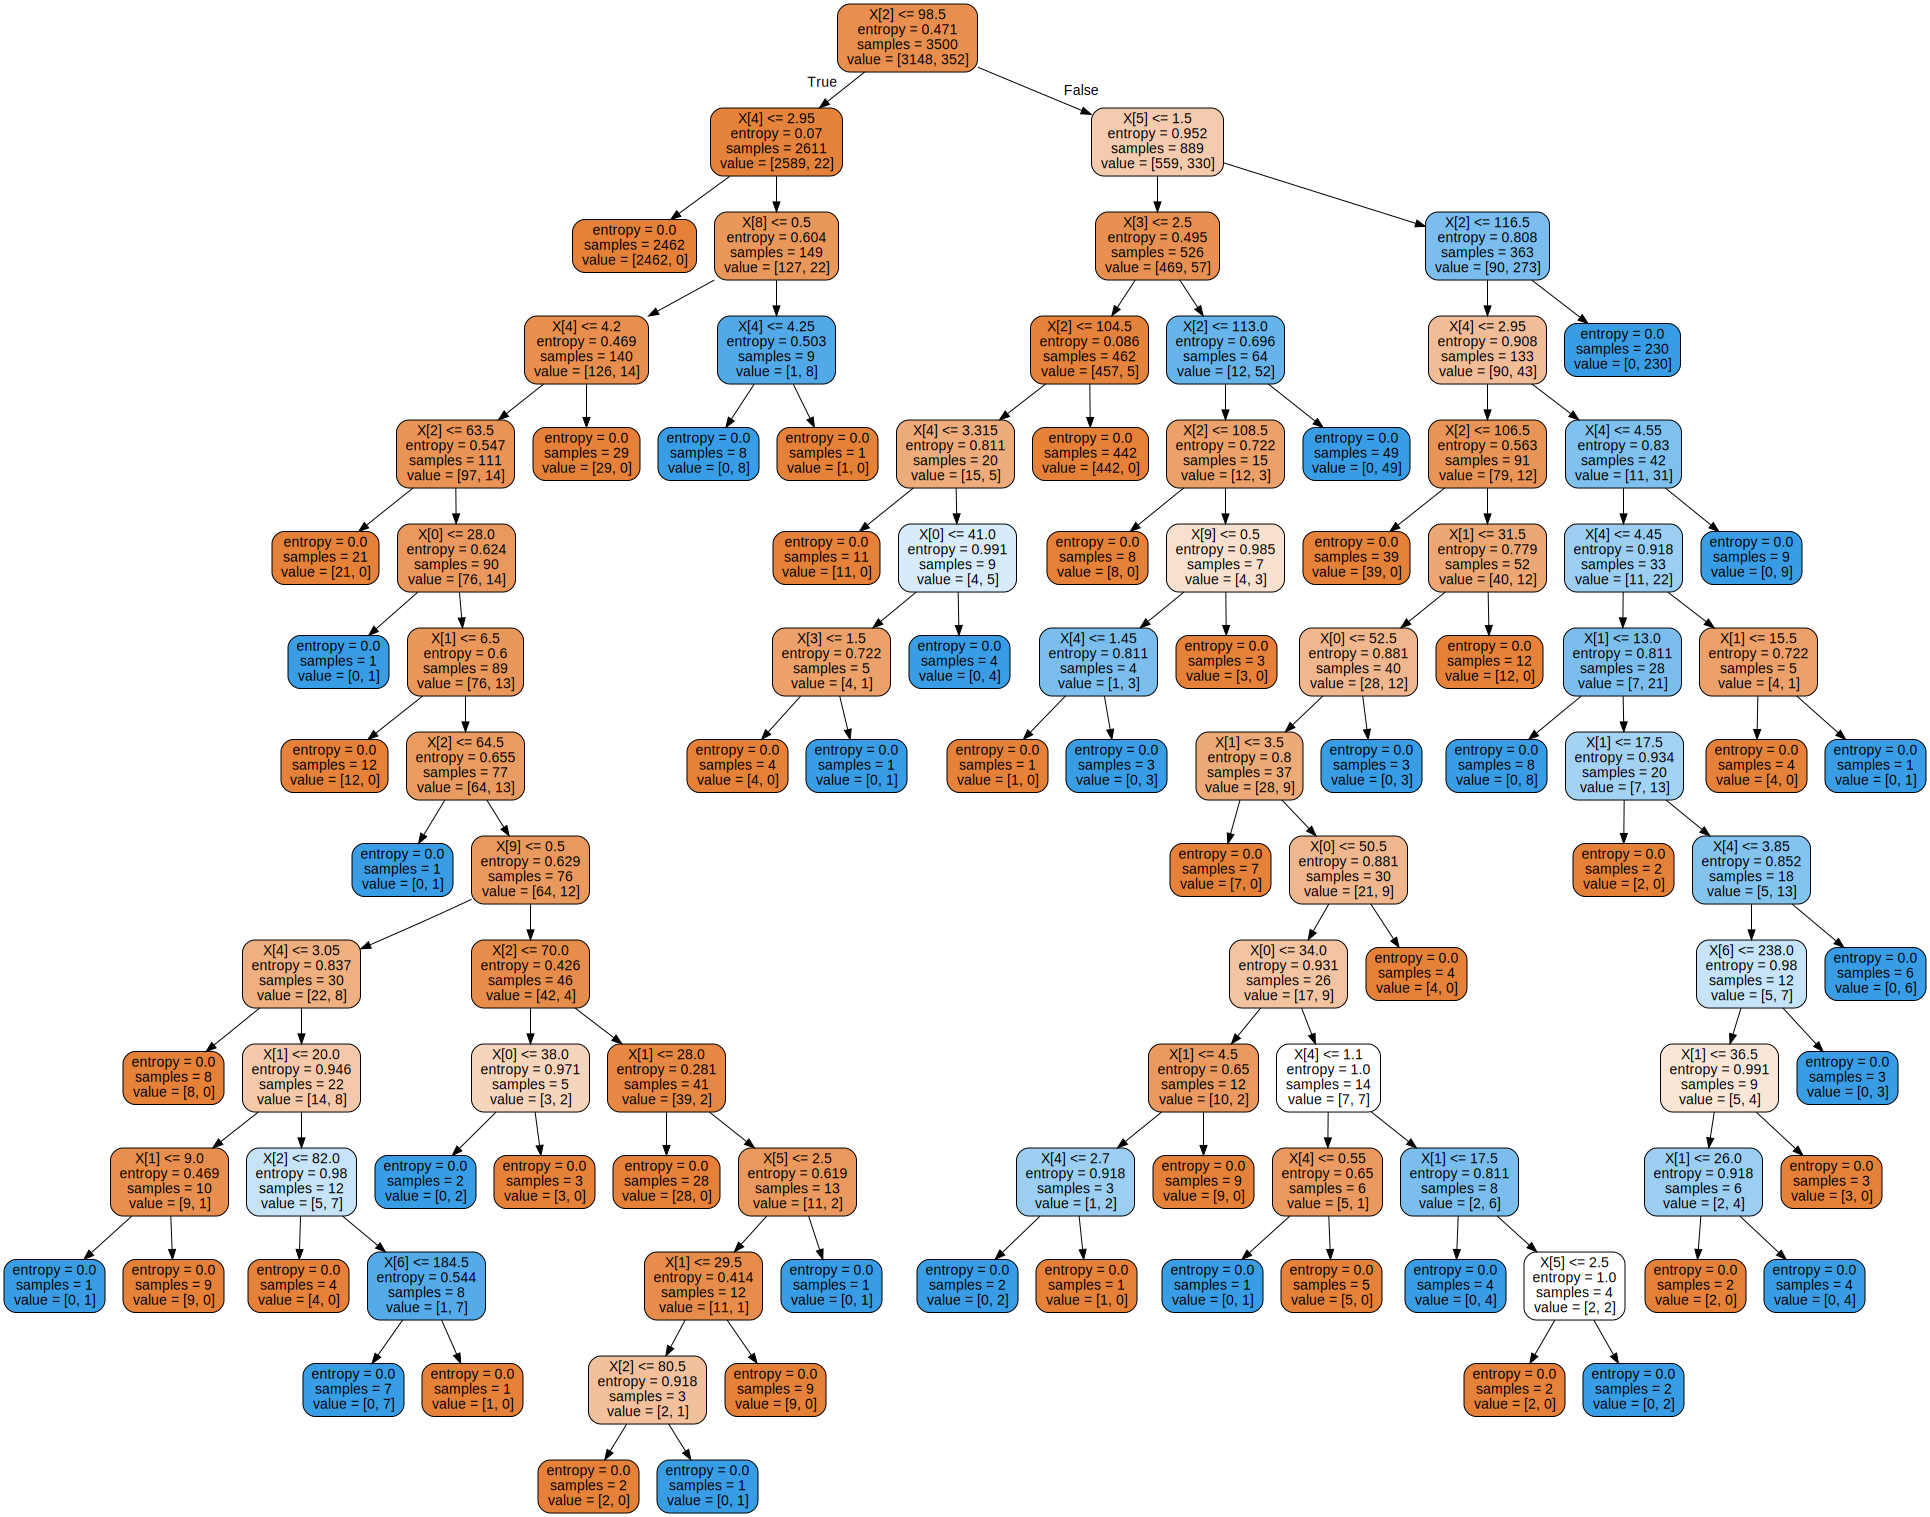

In [11]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(id3, out_file=None, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("Loans")

graph


### Testing

In [12]:
from sklearn.metrics import accuracy_score
test_array_id3 = id3.predict(X_test).tolist()
ID3TestAccuracy = accuracy_score(y_test, test_array_id3)

print('ID3 Testing accuracy: ',ID3TestAccuracy)

ID3 Testing accuracy:  0.9813333333333333


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

prediction_test = id3.predict(X_test).tolist()
print("TESTING DATA RESULTS")
print('Confusion Matrix with Testing Data with ID3 Algorithm:')
print(confusion_matrix(y_test, prediction_test))
print()
print('Classification Report ID3 Algorithm:')
print(classification_report(y_test, prediction_test))
print()

TESTING DATA RESULTS
Confusion Matrix with Testing Data with ID3 Algorithm:
[[1359   13]
 [  15  113]]

Classification Report ID3 Algorithm:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.90      0.88      0.89       128

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500




## Gini Index -CART Decision Tree

### Modelling

In [14]:
# Fitting CART to the dataset 
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier(criterion='gini')
cart.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualisation

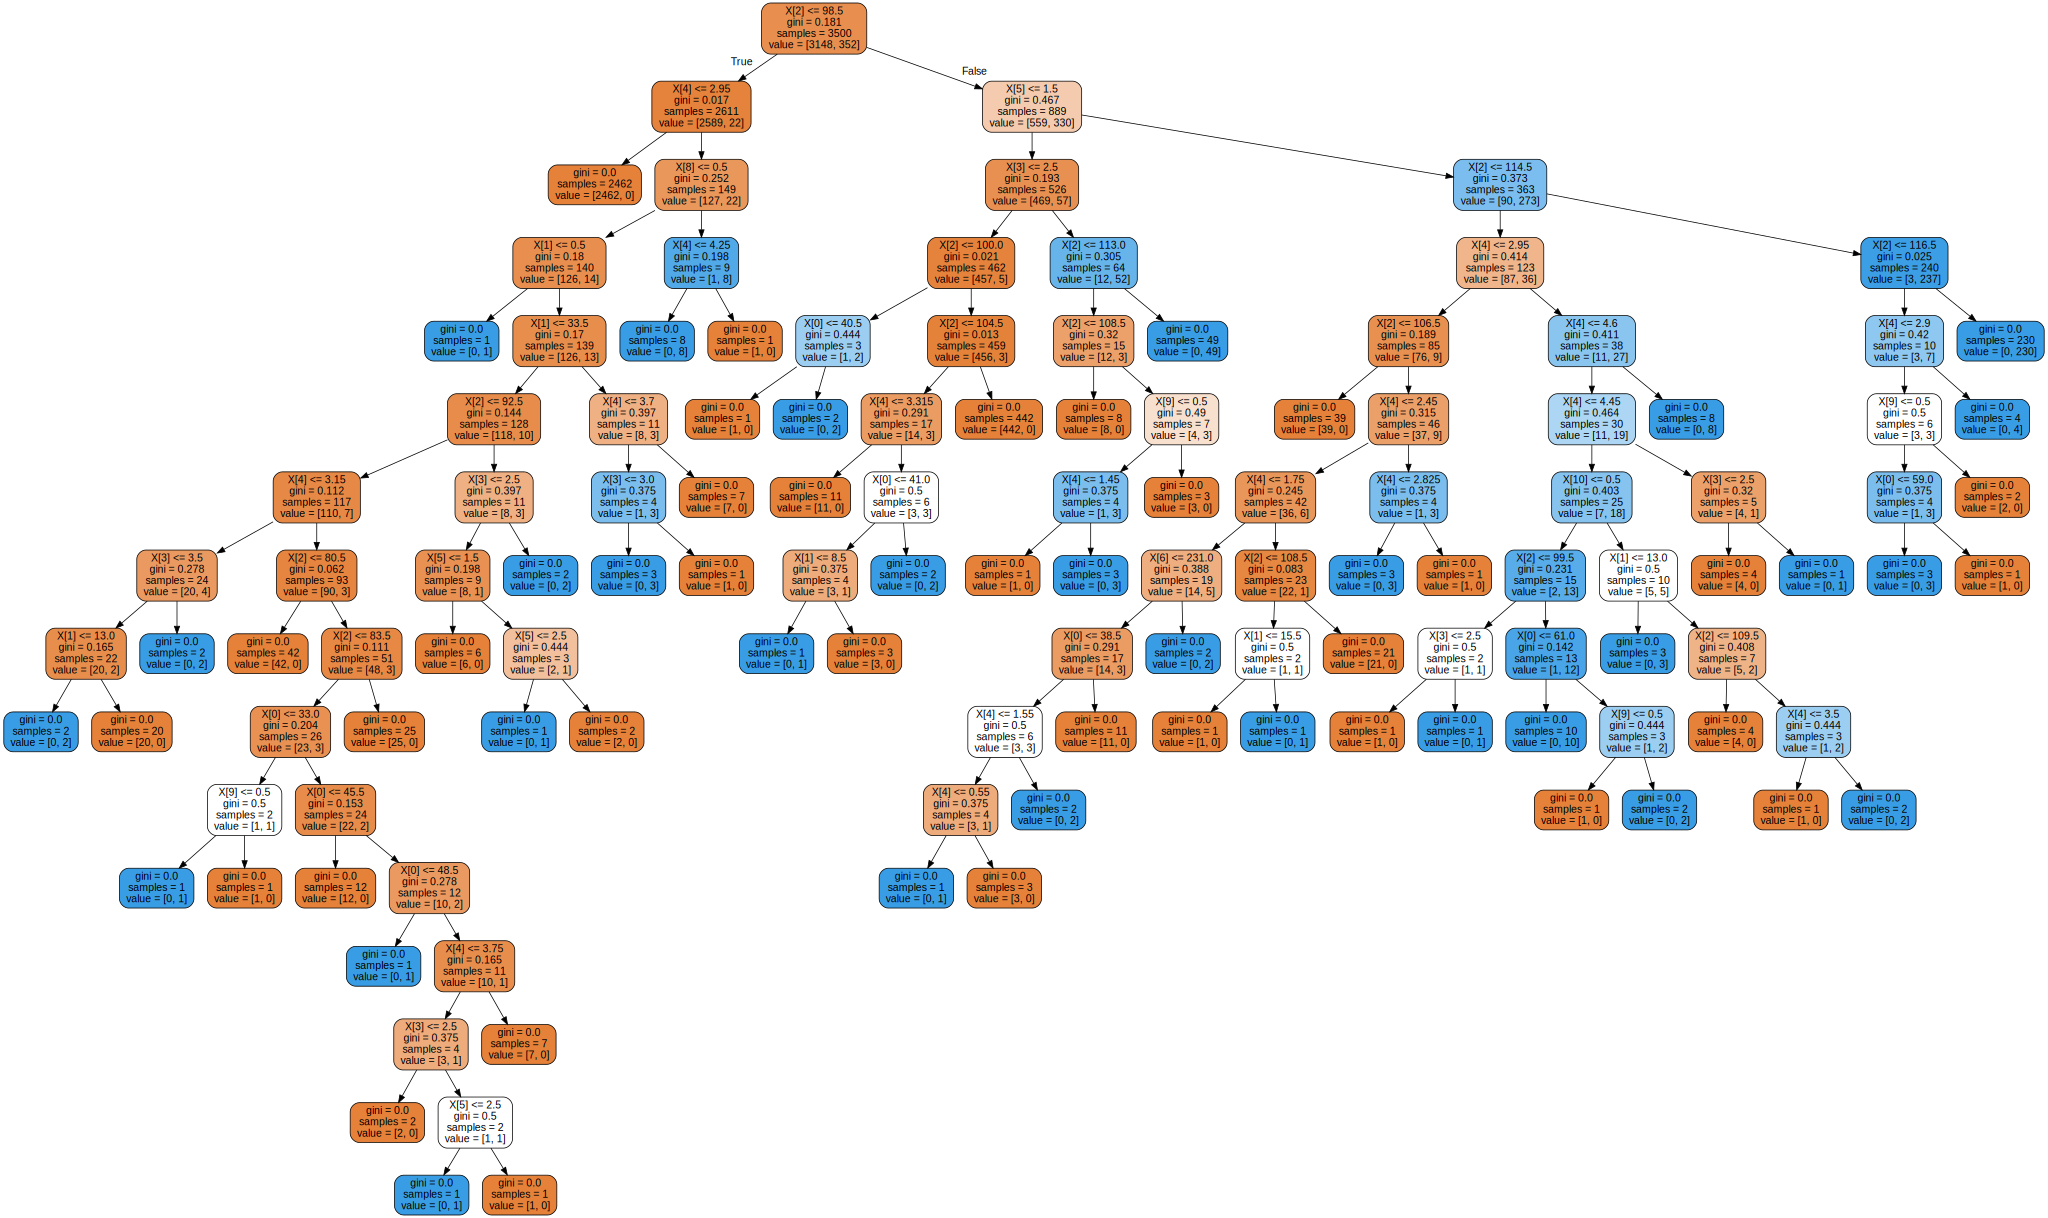

In [15]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(cart, out_file=None, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("Loans")

graph

### Testing

In [16]:
from sklearn.metrics import accuracy_score
test_array_cart = cart.predict(X_test).tolist()
CARTTestAccuracy = accuracy_score(y_test, test_array_cart)

print('CART Testing accuracy: ',CARTTestAccuracy)

CART Testing accuracy:  0.9793333333333333


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

prediction_test = cart.predict(X_test).tolist()
print("TESTING DATA RESULTS")
print('Confusion Matrix with Testing Data with CART Algorithm:')
print(confusion_matrix(y_test, prediction_test))
print()
print('Classification Report ID3 Algorithm:')
print(classification_report(y_test, prediction_test))
print()

TESTING DATA RESULTS
Confusion Matrix with Testing Data with CART Algorithm:
[[1357   15]
 [  16  112]]

Classification Report ID3 Algorithm:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.88      0.88      0.88       128

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.98      0.98      0.98      1500


